# SHOWTIME

In [157]:
import pandas as pd
import os
import mlflow
import json

In [158]:
playlists_link = {
    "CoryKenshinRandomVideos": "https://www.youtube.com/playlist?list=PLxoHK1S7LhWSU230SAT7fDUsLiXCwaBMo",
    "MusicVideos": "https://youtube.com/playlist?list=PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_&si=SiaK1ztgFATZg10B",
    "RandomVideos": "https://youtube.com/playlist?list=PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ&si=tcnc1i_SwIo1wgdP", # (3521 Videos, use with caution maybe AWOKWAOKAWOKAW)
}
project_directory = "/home/vane/dataScience/datastuff"
os.chdir(project_directory)

In [159]:
def playlist_download(playlists: dict[str, str]) -> None:
    os.chdir(os.path.join(os.getcwd(), "data"))
    for playlist_title, playlist_link in playlists.items():
        os.mkdir(f"{playlist_title}Playlist")
        os.chdir(os.path.join(os.getcwd(), f"{playlist_title}Playlist"))
        os.system(f"yt-dlp --write-info-json --skip-download --convert-thumbnails jpg --write-thumbnail -o \"%(playlist_index)s.%(ext)s\" {playlist_link}")
        os.chdir("..")

In [160]:
# playlist_download(playlists_link)

In [161]:
numerical_feature_json_keys = ["comment_count", "view_count", "like_count"]
text_feature_json_keys = ["title", "description", "channel"]
categories_feature_json_keys = ["tags", "categories"]
duration_string_feature_json_key = "duration_string"
playlist_json_file = "000.info.json"

def duration_string_to_seconds(duration_string: str) -> int:
    '''Converts duration strings to seconds'''
    multiplier = 1
    total_seconds = 0
    for digit in duration_string.split(":")[::-1]:
        total_seconds += int(digit) * multiplier
        multiplier *= 60
    return total_seconds

def video_json_to_dictionary(file_path: str) -> dict:
    '''Get specific features from .json file and return as dictionary pair of (name, value)'''
    with open(file_path, 'r') as f:
        result = dict()
        data = json.load(f)
        for key in numerical_feature_json_keys:
            result.update({key: data.get(key, 0)}) # get(key, default_value)
        for key in text_feature_json_keys:
            result.update({key: data.get(key, "")})
        for key in categories_feature_json_keys:
            result.update({key: " ".join(data.get(key, ""))})
        result.update({"duration": duration_string_to_seconds(data[duration_string_feature_json_key])})
    return result

def get_title_from_playlist_json(file_path: str) -> str:
    '''Opens .json info file for playlist, then returns the title'''
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data["title"]

def playlist_to_dataframes() -> dict[str, pd.DataFrame]:
    dataframes = dict()
    for root, dirs, files in os.walk(os.path.join(os.getcwd(), "data")):
        # Removes hidden directories from walk
        dirs[:] = [d for d in dirs if not d[0] == '.']
        # Skips directories with 0 files (this also skips playlist directories)
        if len(files) == 0: continue
        # Init playlist dataframe and title
        playlist_dataframe = pd.DataFrame()
        playlist_title = root.split("/")[::-1]root.split("/")[-1][0]       
        # Traverse files in subdirectory (playlist directory)
        for file in files:
            file_path = os.path.join(root, file) # absolute path of the file
            if file == playlist_json_file: # checks and sets playlist info .json
                continue
            elif file.endswith(".json"): # parse video .json
                video_index = [int(file.split(".")[0])]
                playlist_dataframe = pd.concat(
                    [
                        playlist_dataframe, pd.DataFrame(video_json_to_dictionary(file_path)
                        , index=video_index)
                    ]
                    , ignore_index=False # if not ignored, it uses the index of of both dataframes
                )
        # Sorts rows alphabetically (for easier visualisation)
        playlist_dataframe = playlist_dataframe.sort_index()
        dataframes.update({playlist_title: playlist_dataframe})
    return dataframes

In [162]:
shit = playlist_to_dataframes()

In [165]:
music_vids_df = shit[Playlist1'MusicVideosPlaylist']

,comment_count,view_count,like_count,title,description,channel,tags,categories,duration
1,295000,18269454,903172,Reacting to the Five Nights at Freddy's Movie ...,Trailer: https://www.youtube.com/watch?v=0VH9W...,CoryxKenshin,,Gaming,423
2,100000,3968804,449907,30,this video has no purpose other than for me to...,CoryxKenshin,30 coryxkenshin cory kenshin birthday 2022 rem...,Gaming,475
3,29000,4555645,373541,I Can't Hide This Any Longer,https://coryxkenshin.com GOGOGOGO BEFORE IT SE...,CoryxKenshin,i cant hide this any longer cant hide this any...,Gaming,937
4,130000,10211607,876155,Deleting My YouTube Channel.,Promise broken. Thank you for everything.,CoryxKenshin,deleting my youtube channel coryxkenshin cory ...,Gaming,1159
5,94000,10395203,1181217,YouTube: Racism and Favoritism,Never in a million years did I think I would u...,CoryxKenshin,youtube favoritism and racism coryxkenshin cor...,Gaming,838
...,...,...,...,...,...,...,...,...,...
182,169,26047,1988,A Quick Thank You Vlog,Twitter: https://twitter.com/coryxkenshin\nFac...,CoryxKenshin,coryxkenshin cory kenshin quick thank you vlog...,People & Blogs,200
183,31000,2632806,129239,"My Last YouTube Video, Goodbye YouTube..",Twitter: https://twitter.com/coryxkenshin\n\n\...,CoryxKenshin,coryxkenshin cory kenshin my last youtube vide...,People & Blogs,185
184,155,17601,1297,Marriage/Easter Dinner/2500 Subscribers/NAENAE,FOLLOW MY TWITTER : @CoryxKenshin\nFACEBOOK: F...,CoryxKenshin,Marriage (Marriage/union Type) Easter (Holiday...,People & Blogs,239
185,171,63770,3839,Jamming At Guitar Center! [Drum],"When I saw this baby sitting there, I couldn't...",CoryxKenshin,Drums (Musical Instrument) Jamming (Compositio...,People & Blogs,73


<Axes: xlabel='categories'>

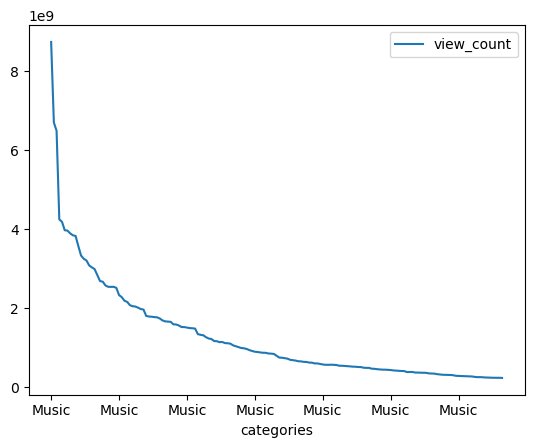

In [176]:
music_vids_df.plot(x="categories", y="view_count")